In [1]:
# Innstall TensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.1


In [2]:
#additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

In [3]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train,x_test = x_train/255.0 , x_test/255.0
print("x_train.shape:",x_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
# The data is only 2D:
#Convolution expects height x width x color
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
# Number of classes
K = len(set(y_train)) # eşsiz değerleri almak için set yazdık
print("number of classes:",K)

number of classes: 10


In [6]:
# Build the model using the funcional API
i = Input(shape=x_train[0].shape)
X = Conv2D(32,(3,3),strides=2,activation='relu')(i)
X = Conv2D(64,(3,3),strides=2,activation='relu')(X)
X = Conv2D(128,(3,3),strides=2,activation='relu')(X)
X = Flatten()(X)
X = Dropout(0.2)(X)
X = Dense(512,activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(K, activation='softmax')(X)

model = Model(i,X)

In [9]:
# Compile and fit
# Note: make sure you're using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7459 - loss: 0.6877 - val_accuracy: 0.8558 - val_loss: 0.3855
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8581 - loss: 0.3775 - val_accuracy: 0.8671 - val_loss: 0.3623
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8835 - loss: 0.3092 - val_accuracy: 0.8821 - val_loss: 0.3308
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8945 - loss: 0.2757 - val_accuracy: 0.8917 - val_loss: 0.2938
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9051 - loss: 0.2469 - val_accuracy: 0.8925 - val_loss: 0.2964
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9168 - loss: 0.2245 - val_accuracy: 0.8979 - val_loss: 0.2856
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9205 - loss: 0.2065 - val_accuracy: 0.8994 - val_loss: 0.2950
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9277 - loss: 0.190

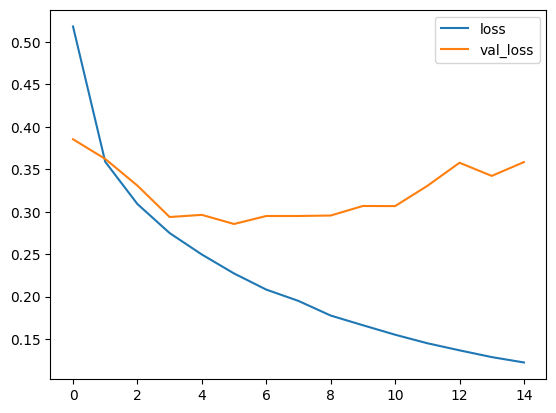

In [11]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
#overfitting var biraz

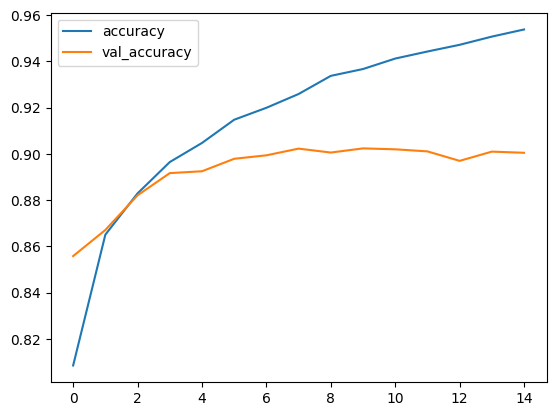

In [12]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix, withoud normalization
[[851   2  19  21   2   0  99   0   6   0]
 [  1 975   0  16   4   0   2   0   2   0]
 [ 17   2 873  11  33   0  62   0   2   0]
 [ 12   4  14 912  25   0  31   0   2   0]
 [  3   2  71  32 772   0 119   0   1   0]
 [  0   0   0   2   0 978   0  14   0   6]
 [ 97   1  81  18  47   0 747   0   9   0]
 [  0   0   0   0   0   9   0 951   0  40]
 [  2   1   3   4   3   2   8   2 975   0]
 [  0   0   0   0   0   5   1  23   0 971]]


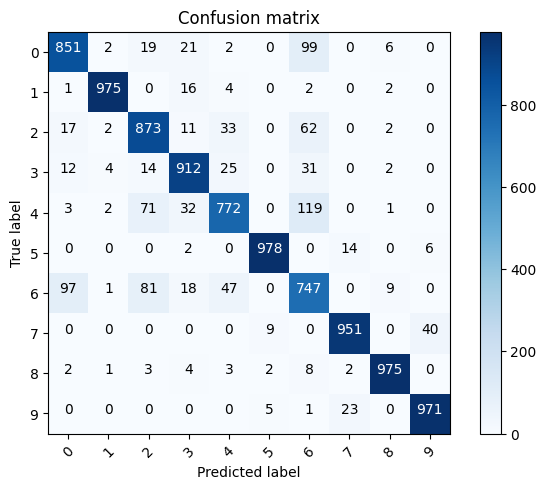

In [14]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  #This function prints and plots the confusion matrix.
  #Normalization can be applied by setting "normalize=True"

  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, withoud normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalize else 'd'
  thresh =cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [15]:
# Label mapping
labels = ''' T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

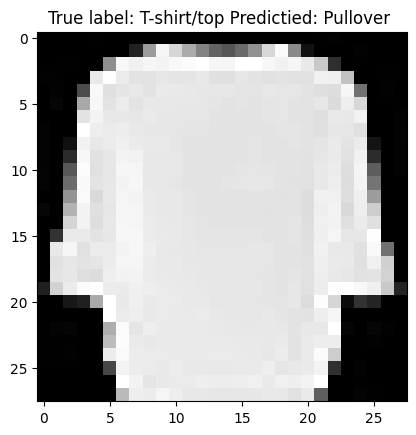

In [18]:
#Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title("True label: %s Predictied: %s " %(labels[y_test[i]],labels[p_test[i]]));

---

1. Veri Setinin Yüklenmesi ve Normalizasyonu

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist  # Fashion MNIST veri setini yükler

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()  # Eğitim ve test verilerini ayırır
x_train, x_test = x_train / 255.0, x_test / 255.0  # Veriyi [0, 1] aralığına normalleştirir
print("x_train.shape:", x_train.shape)


Amaç: Giriş verilerini ölçeklendirmek ve modelin daha hızlı öğrenmesini sağlamak.

Sonuç: x_train ve x_test boyutları (num_samples, 28, 28).

2. Veriyi CNN ile Uyumlu Hale Getirme

In [ ]:
x_train = np.expand_dims(x_train, -1)  # Son eksene bir boyut ekler (renk kanalı için)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)


Amaç: Konvolüsyonel Sinir Ağı (CNN) girişine uygun 4D tensör formatı (num_samples, height, width, channels) sağlamak.

3. Sınıf Sayısını Belirleme

In [ ]:
K = len(set(y_train))  # Eğitim verisindeki eşsiz sınıfların sayısını alır
print("number of classes:", K)


Amaç: Çıkış katmanında kullanılacak sınıf sayısını belirler. Fashion MNIST'de bu değer 10'dur.

4. Modelin İnşa Edilmesi (Fonksiyonel API ile)

In [ ]:
i = Input(shape=x_train[0].shape)  # Giriş boyutunu tanımlama
X = Conv2D(32, (3, 3), strides=2, activation='relu')(i)  # 32 filtreli, 3x3 boyutlu bir Conv2D katmanı
X = Conv2D(64, (3, 3), strides=2, activation='relu')(X)  # 64 filtreli bir Conv2D katmanı
X = Conv2D(128, (3, 3), strides=2, activation='relu')(X)  # Daha büyük filtreler
X = Flatten()(X)  # Çıkışı düzleştirir
X = Dropout(0.2)(X)  # %20 Dropout uygular
X = Dense(512, activation='relu')(X)  # 512 nöronlu bir Dense katmanı
X = Dropout(0.2)(X)  # %20 Dropout
X = Dense(K, activation='softmax')(X)  # Sınıf sayısına uygun çıkış katmanı
model = Model(i, X)  # Modeli oluştur


CNN Yapısı: Çok katmanlı konvolüsyonel filtreler ve tam bağlı katmanlardan oluşur.
Fonksiyonel API: Daha karmaşık ağlar inşa etmek için kullanılır.

5. Modelin Derlenmesi ve Eğitilmesi

In [ ]:
model.compile(
    optimizer='adam',  # Adam optimizasyon algoritması
    loss='sparse_categorical_crossentropy',  # Çok sınıflı sınıflandırma kaybı
    metrics=['accuracy']  # Doğruluk metriği
)
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)  # Modeli eğitir


Amaç: Modelin parametrelerini optimize etmek ve doğruluk metriklerini hesaplamak.

6. Eğitim Kayıplarının Görselleştirilmesi

In [ ]:
plt.plot(r.history['loss'], label='loss')  # Eğitim kayıplarını çizer
plt.plot(r.history['val_loss'], label='val_loss')  # Doğrulama kayıplarını çizer
plt.legend()


Sonuç: Eğitim ve doğrulama kayıplarını analiz eder. Hafif aşırı öğrenme gözlenebilir.

7. Eğitim Doğruluklarının Görselleştirilmesi

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')  # Eğitim doğruluklarını çizer
plt.plot(r.history['val_accuracy'], label='val_accuracy')  # Doğrulama doğruluklarını çizer
plt.legend()


Sonuç: Modelin doğruluk metrikleri analiz edilir.

8. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalizasyon
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)  # Görselleştir
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)  # Test verisindeki tahminler
cm = confusion_matrix(y_test, p_test)  # Confusion matrix
plot_confusion_matrix(cm, list(range(10)))  # Çizdir


Amaç: Hangi sınıflar arasında karışıklık olduğunu görmek.

9. Yanlış Sınıflandırmalar

In [ ]:
labels = ''' T-shirt/top Trouser Pullover Dress Coat Sandal Shirt Sneaker Bag Ankle boot'''.split()
misclassified_idx = np.where(p_test != y_test)[0]  # Yanlış sınıflandırılmış örnekler
i = np.random.choice(misclassified_idx)  # Rastgele bir yanlış sınıflandırma seç
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Yanlış sınıflandırılmış görüntüyü çiz
plt.title("True label: %s Predicted: %s " % (labels[y_test[i]], labels[p_test[i]]))


Amaç: Yanlış sınıflandırılmış örnekleri analiz etmek ve modelin eksikliklerini anlamak.

Özet:

Veri: Fashion MNIST veri seti kullanılarak eğitim yapıldı.

Model: 3 konvolüsyon katmanı, tam bağlı katman ve Dropout ile aşırı öğrenme engellendi.

Eğitim: Eğitim ve doğrulama doğruluk/kayıpları analiz edildi.

Confusion Matrix: Modelin sınıflar arası performansı değerlendirildi.

Yanlış Sınıflar: Yanlış sınıflandırma örnekleri incelendi.
